<a href="https://colab.research.google.com/github/iwanaminami/tokuronX2023/blob/main/SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIR model
感染症の流行過程を記述するモデル  

$$
\begin{cases}
\frac{dS(t)}{dt} = -\beta S(t) I(t)\\
\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$

## 変数  

$S(t)$: 感受性保持者（susceptible）  
$I(t)$: 感染性保持者（Infectious）  
$R(t)$: 回復者（Recovered） or 隔離者（Removed）  

## パラメータ

$\beta$: 感染性（感染力）  
$\gamma$: 回復率  
$T(0)$: 感受性保持者の初期値（最初の時刻の時の値） 

## 以下参考

### 基本再生産数

$R_0$: 基本再生産数
$$
R_0=\frac{\beta S(0)}{\gamma}
$$
  
$z=\frac{R(\infty)}{S(\infty)+I(\infty)+R(\infty)}$: 最終規模（final size）  
  
### 最終規模方程式（final size equation）  

$R_0$と最終規模の関係
$$
1-z=\exp(-zR_0)
$$
  
$$
R_0=-\frac{\ln(1-z)}{z}
$$

### 接触を減らす
（＝$\beta$を小さくする）

時刻$t$について  
$t<t_\varepsilon$のとき、$\varepsilon = 0$  
$t≥t_\varepsilon$のとき、$0 < \varepsilon <1$  

$$
\begin{cases}
\frac{dS(t)}{dt} = -(1-\varepsilon)\beta S(t) I(t)\\
\frac{dI(t)}{dt} = (1-\varepsilon)\beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$

In [2]:
# 実行1
# ライブラリの読み込み
# 最初に1回だけ実行

import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
# 実行2
# データの読み込み
# 最初に1回だけ実行

data_infected = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv")

In [4]:
# 実行3
# 読み込んだデータ

data_infected

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2023/5/4,7343,474,48,67,192,35,63,107,249,...,21,10,189,28,38,56,80,54,63,150
1205,2023/5/5,5807,354,74,89,105,36,56,74,76,...,65,18,207,19,48,70,60,26,68,169
1206,2023/5/6,6229,446,61,99,154,38,79,116,69,...,24,9,202,33,48,68,70,38,29,120
1207,2023/5/7,14436,658,127,148,293,133,117,188,106,...,105,40,687,87,114,133,121,95,168,249


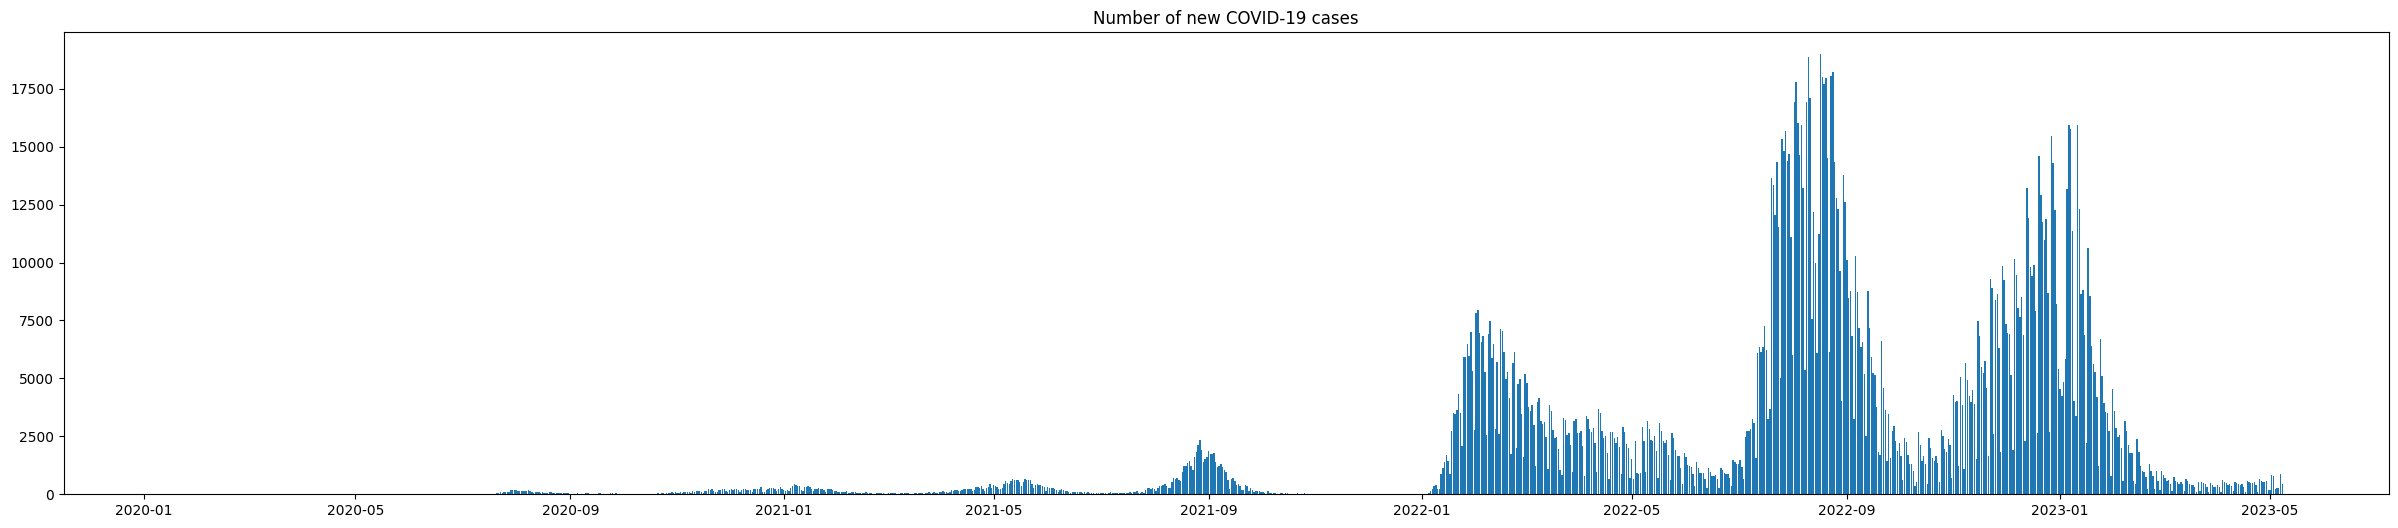

In [5]:
# 実行4
# 全データの確認

plt.figure(figsize=(30,6))
plt.bar(pd.to_datetime(data_infected['Date']), data_infected['Aichi'])
plt.title('Number of new COVID-19 cases')
plt.show()

In [6]:
# 実行5
# データの整形

data_infected['Date'] = pd.to_datetime(data_infected['Date'], format = "%Y/%m/%d")

data_infected_aichi = data_infected[['Date', 'Aichi']]
time_start1 = datetime.datetime(2021,7,1) #最初の日1
time_end1 = datetime.datetime(2021,9,30) #最後の日1
time_start2 = datetime.datetime(2022,7,1) #最初の日2
time_end2 = datetime.datetime(2022,9,30) #最後の日2
data_infected_aichi_5th = data_infected_aichi.query('@time_start1 < Date < @time_end1') # 期間1
data_infected_aichi_8th = data_infected_aichi.query('@time_start2 < Date < @time_end2') # 期間2
print(data_infected_aichi_5th)
print(data_infected_aichi_8th)

          Date  Aichi
533 2021-07-02     44
534 2021-07-03     45
535 2021-07-04     64
536 2021-07-05     21
537 2021-07-06     52
..         ...    ...
618 2021-09-25    251
619 2021-09-26    200
620 2021-09-27     99
621 2021-09-28    148
622 2021-09-29    148

[90 rows x 2 columns]
          Date  Aichi
898 2022-07-02   1470
899 2022-07-03   1164
900 2022-07-04    670
901 2022-07-05   2481
902 2022-07-06   2737
..         ...    ...
983 2022-09-25   3480
984 2022-09-26   1552
985 2022-09-27   2713
986 2022-09-28   2955
987 2022-09-29   2301

[90 rows x 2 columns]


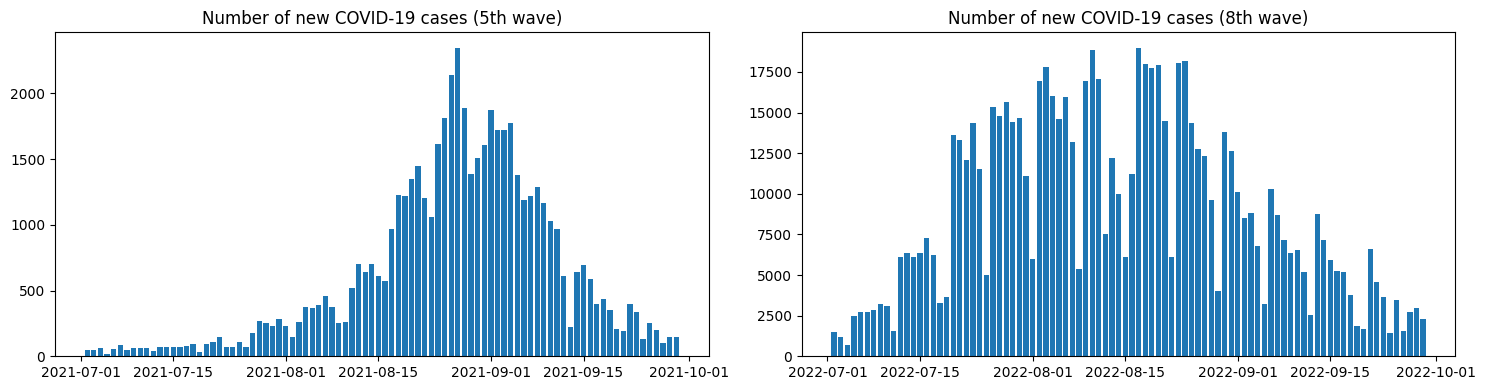

In [7]:
# 実行6
# データのプロット

fig = plt.figure(figsize = (15, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(pd.to_datetime(data_infected_aichi_5th['Date']), data_infected_aichi_5th['Aichi'])
ax1.set_title('Number of new COVID-19 cases (5th wave)')

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(pd.to_datetime(data_infected_aichi_8th['Date']), data_infected_aichi_8th['Aichi'])
ax2.set_title('Number of new COVID-19 cases (8th wave)')

fig.tight_layout()
fig.show()

In [8]:
# 実行7
# 関数の定義（変えない）

def calculate_SIR(beta = 0.000008, gamma = 0.1, x0 = 60000, y0 = 1, z0 = 0, epsilon = 0.8, epsilon_start = 1000):
  r0 = beta*x0/gamma
  print("基本再生産数は",r0,"です")

  dt = 0.01
  t = 0
  x = x0
  y = y0
  z = z0
  xList = [x]
  yList = [y]
  zList = [z]
  tList = [t]
  newinfList = [beta*x*y]
  for i in range(10000):
      t = dt*(i+1)

      if t < epsilon_start:
        xx = x + dt*(-beta*x*y)
        yy = y + dt*(beta*x*y-gamma*y)
        zz = z + dt*(gamma*y)
      else:
        xx = x + dt*(-(1 - epsilon)*beta*x*y)
        yy = y + dt*((1 - epsilon)*beta*x*y-gamma*y)
        zz = z + dt*(gamma*y)
      
      x = xx
      y=yy
      z=zz
      tList.append(t)
      xList.append(x)
      yList.append(y)
      zList.append(z)
      newinfList.append(beta*x*y)

  return [tList, xList, yList, zList, newinfList]

def plot_SIR(out_sir):

  # プロット

  tList = out_sir[0]
  newinfList = out_sir[4]


  fig = plt.figure(figsize = (15, 4))

  tList1 = [time_start1 + datetime.timedelta(days = i) for i in tList]
  ax1 = fig.add_subplot(1, 2, 1)

  if epsilon_start < 100:
    ax1.axvspan(time_start1 + datetime.timedelta(days = epsilon_start), time_start1 + datetime.timedelta(days = 100), color="gray", alpha=0.3)

  ax1.bar(pd.to_datetime(data_infected_aichi_5th['Date']), data_infected_aichi_5th['Aichi'])
  ax1.plot(tList1, newinfList, color="#ff0000")
  ax1.set_title('Number of new COVID-19 cases (5th wave)')

  tList2 = [time_start2 + datetime.timedelta(days = i) for i in tList]
  ax2 = fig.add_subplot(1, 2, 2)

  if epsilon_start < 100:
    ax2.axvspan(time_start2 + datetime.timedelta(days = epsilon_start), time_start2 + datetime.timedelta(days = 100), color="gray", alpha=0.3)

  ax2.bar(pd.to_datetime(data_infected_aichi_8th['Date']), data_infected_aichi_8th['Aichi'])
  ax2.plot(tList2, newinfList, color="#ff0000")
  ax2.set_title('Number of new COVID-19 cases (8th wave)')

  fig.tight_layout()
  fig.show()

def plot_SIR_all(out_sir):
  # プロット

  tList = out_sir[0]
  xList = out_sir[1]
  yList = out_sir[2]
  zList = out_sir[3]
  newinfList = out_sir[4]


  fig = plt.figure(figsize = (15, 4))

  tList1 = [time_start1 + datetime.timedelta(days = i) for i in tList]
  ax1 = fig.add_subplot(1, 2, 1)

  if epsilon_start < 100:
    ax1.axvspan(time_start1 + datetime.timedelta(days = epsilon_start), time_start1 + datetime.timedelta(days = 100), color="gray", alpha=0.3)

  ax1.bar(pd.to_datetime(data_infected_aichi_5th['Date']), data_infected_aichi_5th['Aichi'])
  ax1.plot(tList1, xList, color="#0000ff", label = 'Susceptible')
  ax1.plot(tList1, yList, color="#ffaaaa", label = 'Infectious')
  ax1.plot(tList1, zList, color="#00ff00", label = 'Recoverd')
  ax1.plot(tList1, newinfList, color="#ff0000", label = 'New cases')
  ax1.legend()
  ax1.set_title('5th wave')

  tList2 = [time_start2 + datetime.timedelta(days = i) for i in tList]
  ax2 = fig.add_subplot(1, 2, 2)

  if epsilon_start < 100:
    ax2.axvspan(time_start2 + datetime.timedelta(days = epsilon_start), time_start2 + datetime.timedelta(days = 100), color="gray", alpha=0.3)

  ax2.bar(pd.to_datetime(data_infected_aichi_8th['Date']), data_infected_aichi_8th['Aichi'])
  ax2.plot(tList2, xList, color="#0000ff", label = 'Susceptible')
  ax2.plot(tList2, yList, color="#ffaaaa", label = 'Infectious')
  ax2.plot(tList2, zList, color="#00ff00", label = 'Recoverd')
  ax2.plot(tList2, newinfList, color="#ff0000", label = 'New cases')
  ax2.legend()
  ax2.set_title('8th wave')

  fig.tight_layout()
  fig.show()

## パラメータを変更して計算してみる

ここを変えてみましょう。

基本再生産数は 4.8 です


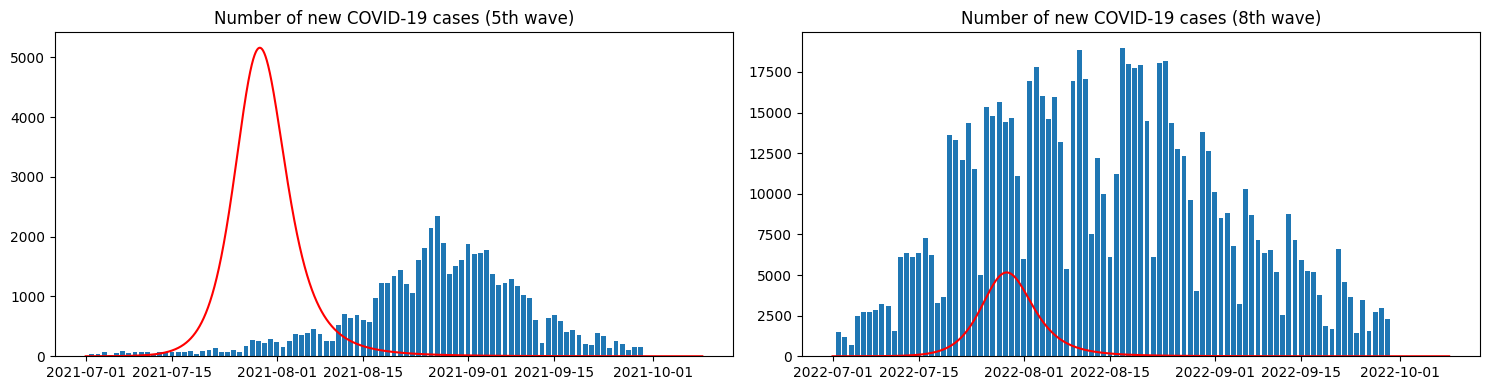

In [9]:
# パラメータの設定（この値を提出）
beta = 0.000008 # 0.000008, 変えてみる
gamma = 0.1 # 0.1, 変えてみる
x0 = 60000 # 60000, 変えてみる
y0 = 1
z0 = 0
epsilon = 0.8 # 0.8, 0〜1, 後で変えてみる
epsilon_start = 1000 # 1000, 〜100, 後で変えてみる

# 計算とプロット（このプロットを提出）
plot_SIR(calculate_SIR(beta = beta, gamma = gamma, x0 = x0, y0 = y0, z0 = z0, epsilon = epsilon, epsilon_start = epsilon_start))

基本再生産数は 4.8 です


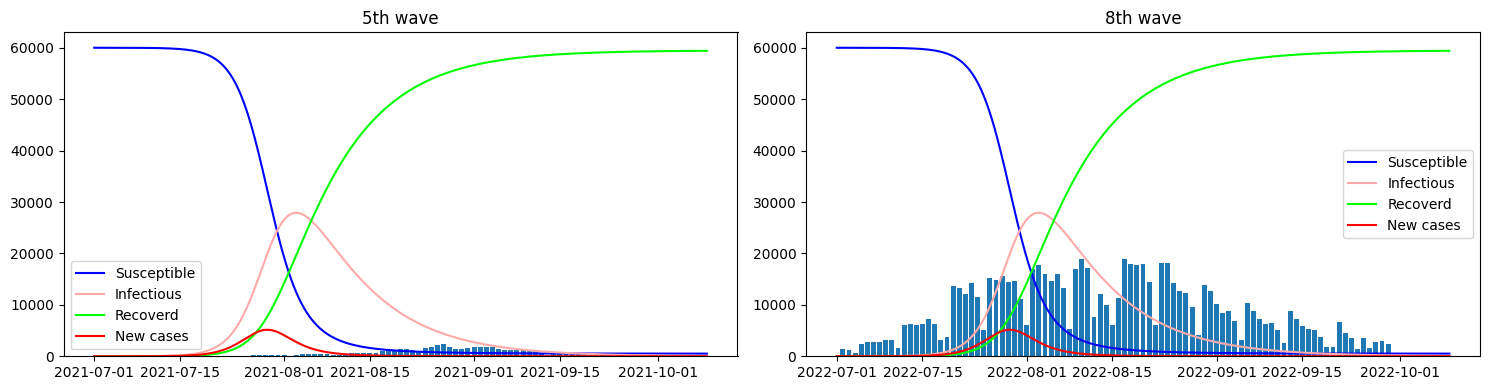

In [10]:
# 全てプロット
# 新規感染者は赤

plot_SIR_all(calculate_SIR(beta = beta, gamma = gamma, x0 = x0, y0 = y0, z0 = z0, epsilon = epsilon, epsilon_start = epsilon_start))

レポートのために、パラメータ（$\beta, \gamma, S(0)$）の値から、感染症流行の要因などについて考察してみましょう。

参考など：  
- 第３波、第５波、第６波、第７波の比較（まとめ）  
https://www.mhlw.go.jp/content/10900000/001010896.pdf
- オミクロン株による第８波における死亡者数の増加に関する考察  
https://www.mhlw.go.jp/content/10900000/001062650.pdf